In [1]:
import tonic
from tonic import datasets, transforms

We calculate the time between two frames from looking at the raw data

In [2]:
dataset = datasets.DAVISDATA(save_to="data", recording="shapes_6dof")

data, targets = dataset[0]
events, imu, images = data
frame_time = images['ts'][1] - images['ts'][0]

Next we specify the time surface transform that is going to be applied to events only whenever a new sample is loaded

In [15]:
# You will need at least Tonic 1.3.2 for this to work!
sufarce_transform = transforms.ToTimesurface(sensor_size=dataset.sensor_size, tau=frame_time, dt=frame_time)

def data_transform(data):
    events, imu, images = data
    surfaces = sufarce_transform(events)
    return surfaces, imu, images

Let's redefine the dataset with the data transform

In [8]:
dataset = datasets.DAVISDATA(save_to="data", recording="shapes_6dof", transform=data_transform)

Loading the whole recording!

In [10]:
surfs, imu, images = dataset[0][0]

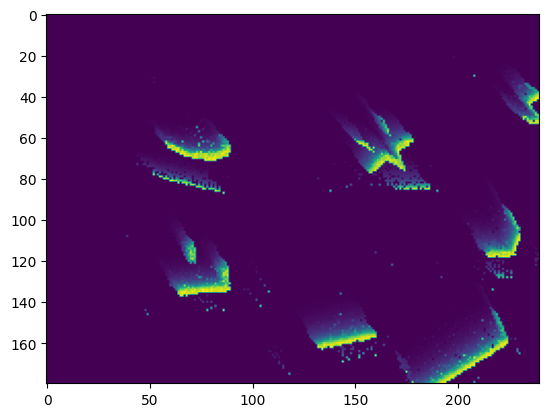

In [14]:
import matplotlib.pyplot as plt

plt.imshow(surfs[100, 0, :, :])